In [2]:
#importing libs
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataset
data_train = pd.read_csv('../dataset/train_data_covid.csv')
data_test = pd.read_csv('../dataset/test_data_covid.csv')


In [4]:
data_train

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,OxygenTanks,PopulationDensityPerSqKm
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,8262,867
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,9136,61
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,3826,316
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,9789,806
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,882,369
...,...,...,...,...,...,...,...,...,...,...,...
14996,14997,2021-05-17,8:00 AM,Lakshadweep,-,-,3633,14,4767,4046,490
14997,14998,2021-05-17,8:00 AM,Madhya Pradesh,-,-,629741,6992,731385,1195,595
14998,14999,2021-05-17,8:00 AM,Maharashtra,-,-,4826371,81486,5378452,9289,195
14999,15000,2021-05-17,8:00 AM,Manipur,-,-,32674,578,39729,576,296


In [5]:
data_test

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Confirmed,OxygenTanks,PopulationDensityPerSqKm
0,15001,2021-05-17,8:00 AM,Meghalaya,-,-,18478,23332,191,514
1,15002,2021-05-17,8:00 AM,Mizoram,-,-,6687,8829,1111,563
2,15003,2021-05-17,8:00 AM,Nagaland,-,-,13767,18076,9896,577
3,15004,2021-05-17,8:00 AM,Odisha,-,-,514532,612224,6091,615
4,15005,2021-05-17,8:00 AM,Puducherry,-,-,65689,84506,220,573
...,...,...,...,...,...,...,...,...,...,...
3105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,650353,8796,659
3106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,80660,9330,488
3107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,342462,6290,686
3108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,1708812,723,115


In [6]:
#taking the required features
data_train_abs = data_train[["Date", "State/UnionTerritory", "Cured", "Deaths", "Confirmed", "OxygenTanks", "PopulationDensityPerSqKm"]]
data_test_abs = data_test[["Date", "State/UnionTerritory", "Cured", "Confirmed", "OxygenTanks", "PopulationDensityPerSqKm"]]

In [7]:
data_train_abs

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,OxygenTanks,PopulationDensityPerSqKm
0,2020-01-30,Kerala,0,0,1,8262,867
1,2020-01-31,Kerala,0,0,1,9136,61
2,2020-02-01,Kerala,0,0,2,3826,316
3,2020-02-02,Kerala,0,0,3,9789,806
4,2020-02-03,Kerala,0,0,3,882,369
...,...,...,...,...,...,...,...
14996,2021-05-17,Lakshadweep,3633,14,4767,4046,490
14997,2021-05-17,Madhya Pradesh,629741,6992,731385,1195,595
14998,2021-05-17,Maharashtra,4826371,81486,5378452,9289,195
14999,2021-05-17,Manipur,32674,578,39729,576,296


In [8]:
data_test_abs

,Date,State/UnionTerritory,Cured,Confirmed,OxygenTanks,PopulationDensityPerSqKm
0,2021-05-17,Meghalaya,18478,23332,191,514
1,2021-05-17,Mizoram,6687,8829,1111,563
2,2021-05-17,Nagaland,13767,18076,9896,577
3,2021-05-17,Odisha,514532,612224,6091,615
4,2021-05-17,Puducherry,65689,84506,220,573
...,...,...,...,...,...,...
3105,2021-08-11,Telangana,638410,650353,8796,659
3106,2021-08-11,Tripura,77811,80660,9330,488
3107,2021-08-11,Uttarakhand,334650,342462,6290,686
3108,2021-08-11,Uttar Pradesh,1685492,1708812,723,115


In [9]:
print("Train: \n")
print(data_train_abs.isnull().sum())
print()
print(data_train_abs.dtypes)

Train: 

Date                        0
State/UnionTerritory        0
Cured                       0
Deaths                      0
Confirmed                   0
OxygenTanks                 0
PopulationDensityPerSqKm    0
dtype: int64

Date                        object
State/UnionTerritory        object
Cured                        int64
Deaths                       int64
Confirmed                    int64
OxygenTanks                  int64
PopulationDensityPerSqKm     int64
dtype: object


In [10]:
print("Test:")
print(data_test_abs.isnull().sum())
print()
print(data_test_abs.dtypes)

Test:
Date                        0
State/UnionTerritory        0
Cured                       0
Confirmed                   0
OxygenTanks                 0
PopulationDensityPerSqKm    0
dtype: int64

Date                        object
State/UnionTerritory        object
Cured                        int64
Confirmed                    int64
OxygenTanks                  int64
PopulationDensityPerSqKm     int64
dtype: object


In [11]:
#data analysis
number_of_weeks_training = len(data_train_abs['Date'].unique()) / 7
print("Available data for Training (weeks) =", number_of_weeks_training)

number_of_weeks_testing = len(data_test_abs['Date'].unique()) / 7
print("Avaialble data for Testing (weeks) =", number_of_weeks_testing)

Available data for Training (weeks) = 67.71428571428571
Avaialble data for Testing (weeks) = 12.428571428571429


In [12]:
number_of_states_training = len(data_train_abs['State/UnionTerritory'].unique())
print("Number of States & UTs in data (train) =", number_of_states_training)
print("Name of States/UTs in Train =", data_train_abs['State/UnionTerritory'].unique())

Number of States & UTs in data (train) = 40
Name of States/UTs in Train = ['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya'
 'Dadra and Nagar Haveli and Daman and Diu'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu' 'Lakshadweep'
 'Telangana']


In [13]:
number_of_states_testing = len(data_test_abs['State/UnionTerritory'].unique())
print("\nNumber of States & UTs in data (test) =", number_of_states_testing)
print("Name of States/UTs in Test =", data_test_abs['State/UnionTerritory'].unique())


Number of States & UTs in data (test) = 42
Name of States/UTs in Test = ['Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttarakhand'
 'Uttar Pradesh' 'West Bengal' 'Andaman and Nicobar Islands'
 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Dadra and Nagar Haveli' 'Bihar****'
 'Madhya Pradesh***' 'Himanchal Pradesh' 'Karanataka' 'Maharashtra***']


In [14]:
set1 = set(data_train_abs['State/UnionTerritory'])
set2 = set(data_test_abs['State/UnionTerritory'])

elements_only_in_array1 = set1 - set2
print("States/UTs present only in Train =", elements_only_in_array1)

elements_only_in_array2 = set2 - set1
print("States/UTs present only in Test =", elements_only_in_array2)

States/UTs present only in Train = {'Telengana', 'Daman & Diu', 'Unassigned', 'Cases being reassigned to states'}
States/UTs present only in Test = {'Karanataka', 'Bihar****', 'Madhya Pradesh***', 'Dadra and Nagar Haveli', 'Himanchal Pradesh', 'Maharashtra***'}


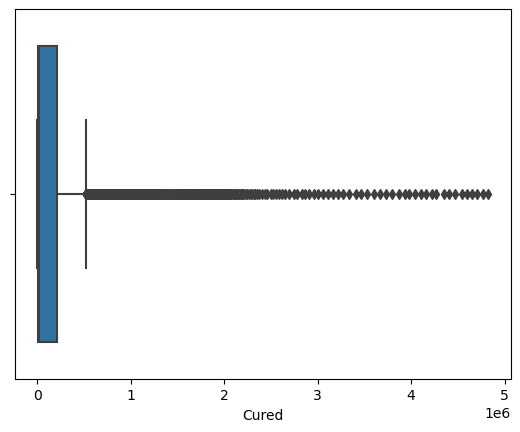

In [15]:
sns.boxplot(x = 'Cured', data = data_train_abs)
plt.show()

First Quantile = 1634.0 
Second Quantile = 207029.0


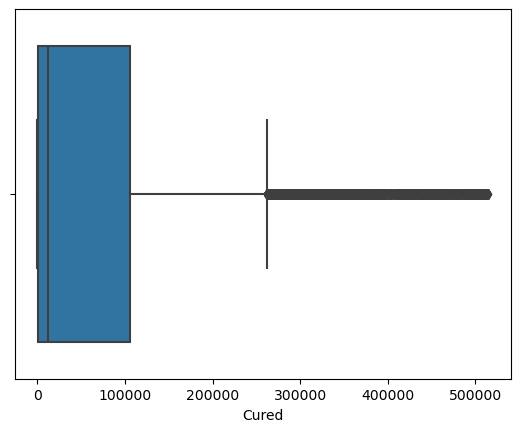

In [16]:
#removing outilers for Cured
q1 = data_train_abs['Cured'].quantile(0.25)
q3 = data_train_abs['Cured'].quantile(0.75)

print("First Quantile =", q1, "\nSecond Quantile =", q3)

IQR = q3 - q1
ul = q3 + 1.5 * IQR
ll = q1 - 1.5 * IQR

data_train_abs_without_outlier = data_train_abs[((data_train_abs['Cured'] >= ll) & (data_train_abs['Cured'] <= ul))]
data_train_abs_without_outlier

sns.boxplot(x = "Cured", data = data_train_abs_without_outlier)
plt.show()

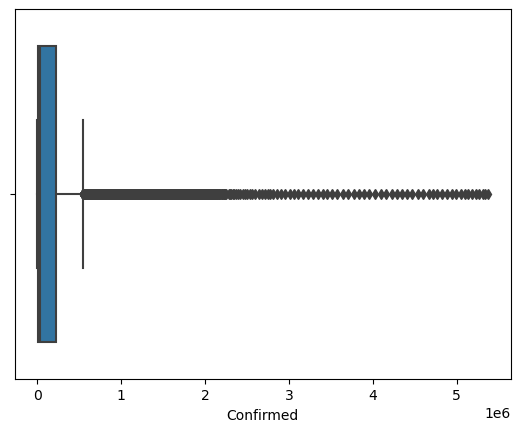

In [17]:
sns.boxplot(x = 'Confirmed', data = data_train_abs)
plt.show()

First Quantile = 2879.0 
Second Quantile = 219119.0


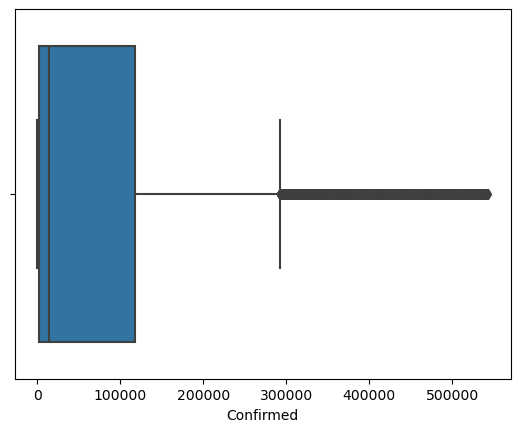

In [18]:
#removing outilers for Confirmed
q1 = data_train_abs['Confirmed'].quantile(0.25)
q3 = data_train_abs['Confirmed'].quantile(0.75)

print("First Quantile =", q1, "\nSecond Quantile =", q3)

IQR = q3 - q1
ul = q3 + 1.5 * IQR
ll = q1 - 1.5 * IQR

data_train_abs_without_outlier = data_train_abs[((data_train_abs['Confirmed'] >= ll) & (data_train_abs['Confirmed'] <= ul))]
data_train_abs_without_outlier

sns.boxplot(x = "Confirmed", data = data_train_abs_without_outlier)
plt.show()

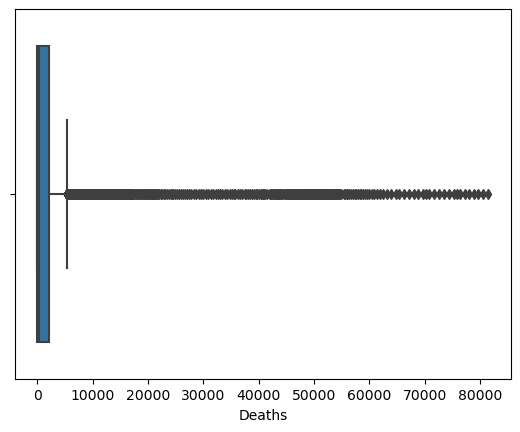

In [19]:
sns.boxplot(x = 'Deaths', data = data_train_abs)
plt.show()

First Quantile = 12.0 
Second Quantile = 2113.0


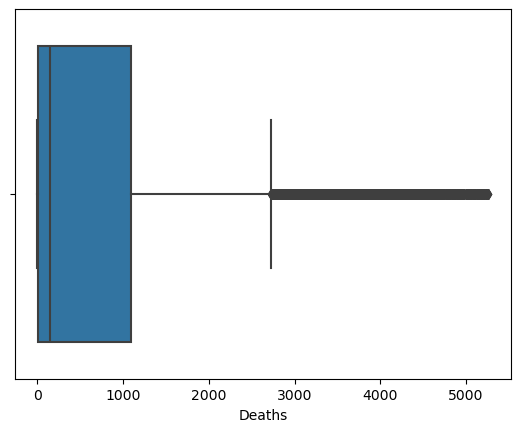

In [20]:
#removing outilers for Deaths
q1 = data_train_abs['Deaths'].quantile(0.25)
q3 = data_train_abs['Deaths'].quantile(0.75)

print("First Quantile =", q1, "\nSecond Quantile =", q3)

IQR = q3 - q1
ul = q3 + 1.5 * IQR
ll = q1 - 1.5 * IQR

data_train_abs_without_outlier = data_train_abs[((data_train_abs['Deaths'] >= ll) & (data_train_abs['Deaths'] <= ul))]
data_train_abs_without_outlier

sns.boxplot(x = "Deaths", data = data_train_abs_without_outlier)
plt.show()

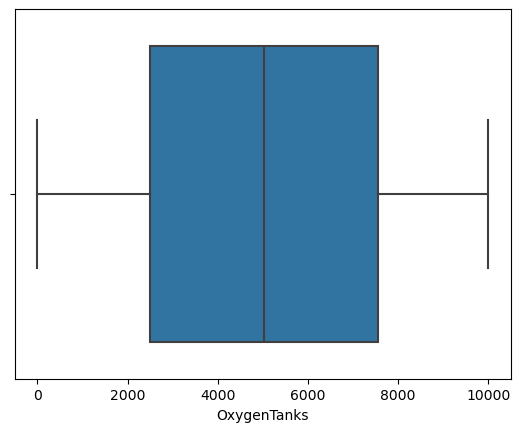

In [21]:
sns.boxplot(x = 'OxygenTanks', data = data_train_abs)
plt.show()

First Quantile = 2506.0 
Second Quantile = 7554.0


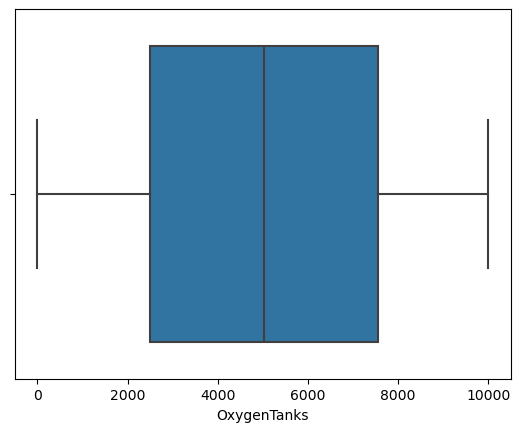

In [22]:
#removing outilers for OxygenTanks
q1 = data_train_abs['OxygenTanks'].quantile(0.25)
q3 = data_train_abs['OxygenTanks'].quantile(0.75)

print("First Quantile =", q1, "\nSecond Quantile =", q3)

IQR = q3 - q1
ul = q3 + 1.5 * IQR
ll = q1 - 1.5 * IQR

data_train_abs_without_outlier = data_train_abs[((data_train_abs['OxygenTanks'] >= ll) & (data_train_abs['OxygenTanks'] <= ul))]
data_train_abs_without_outlier

sns.boxplot(x = "OxygenTanks", data = data_train_abs_without_outlier)
plt.show()

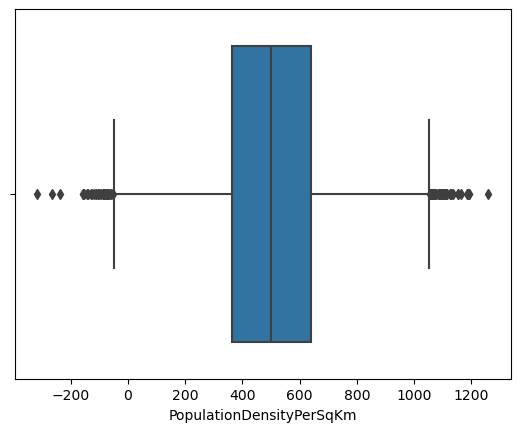

In [23]:
sns.boxplot(x = 'PopulationDensityPerSqKm', data = data_train_abs)
plt.show()

First Quantile = 364.0 
Second Quantile = 640.0


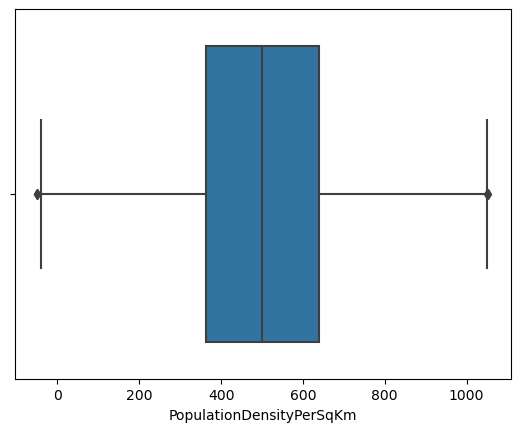

In [24]:
#removing outilers for PopulationDensityPerSqKm
q1 = data_train_abs['PopulationDensityPerSqKm'].quantile(0.25)
q3 = data_train_abs['PopulationDensityPerSqKm'].quantile(0.75)

print("First Quantile =", q1, "\nSecond Quantile =", q3)

IQR = q3 - q1
ul = q3 + 1.5 * IQR
ll = q1 - 1.5 * IQR

data_train_abs_without_outlier = data_train_abs[((data_train_abs['PopulationDensityPerSqKm'] >= ll) & (data_train_abs['PopulationDensityPerSqKm'] <= ul))]
data_train_abs_without_outlier

sns.boxplot(x = "PopulationDensityPerSqKm", data = data_train_abs_without_outlier)
plt.show() 

In [25]:
data_train_abs_without_outlier

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,OxygenTanks,PopulationDensityPerSqKm
0,2020-01-30,Kerala,0,0,1,8262,867
1,2020-01-31,Kerala,0,0,1,9136,61
2,2020-02-01,Kerala,0,0,2,3826,316
3,2020-02-02,Kerala,0,0,3,9789,806
4,2020-02-03,Kerala,0,0,3,882,369
...,...,...,...,...,...,...,...
14996,2021-05-17,Lakshadweep,3633,14,4767,4046,490
14997,2021-05-17,Madhya Pradesh,629741,6992,731385,1195,595
14998,2021-05-17,Maharashtra,4826371,81486,5378452,9289,195
14999,2021-05-17,Manipur,32674,578,39729,576,296


In [26]:
data_train_abs_without_outlier['State/UnionTerritory'].value_counts()

State/UnionTerritory
Kerala                                      472
Delhi                                       438
Rajasthan                                   438
Uttar Pradesh                               436
Haryana                                     435
Ladakh                                      435
Tamil Nadu                                  435
Maharashtra                                 434
Karnataka                                   433
Punjab                                      433
Andhra Pradesh                              432
Jammu and Kashmir                           431
Odisha                                      427
West Bengal                                 425
Telengana                                   425
Uttarakhand                                 424
Chhattisgarh                                424
Chandigarh                                  423
Puducherry                                  421
Gujarat                                     421
Madhya Pradesh     

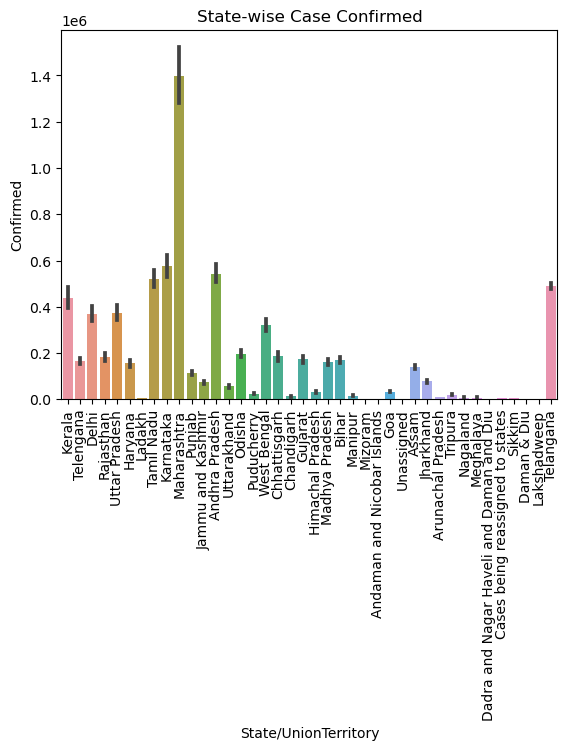

In [27]:
sns.barplot(x = 'State/UnionTerritory', y = 'Confirmed', data = data_train_abs_without_outlier)
plt.xticks(rotation=90)
plt.title("State-wise Case Confirmed")
plt.show()

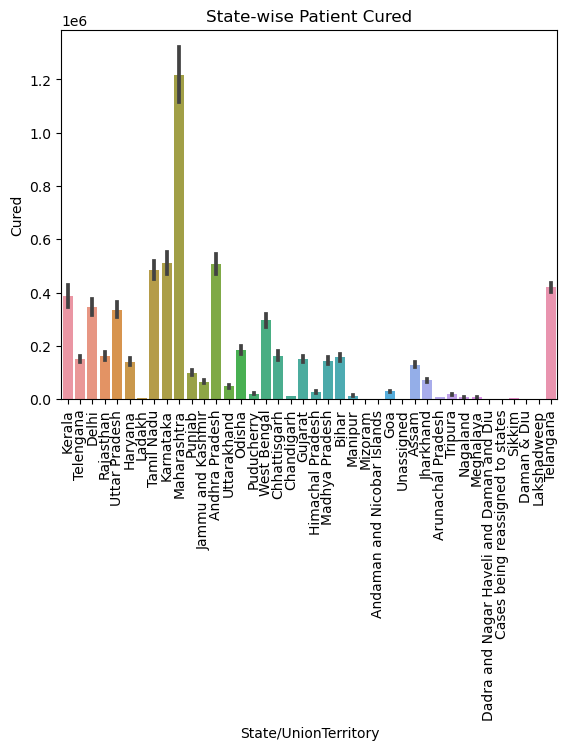

In [28]:
sns.barplot(x = 'State/UnionTerritory', y = 'Cured', data = data_train_abs_without_outlier)
plt.xticks(rotation=90)
plt.title("State-wise Patient Cured")
plt.show()

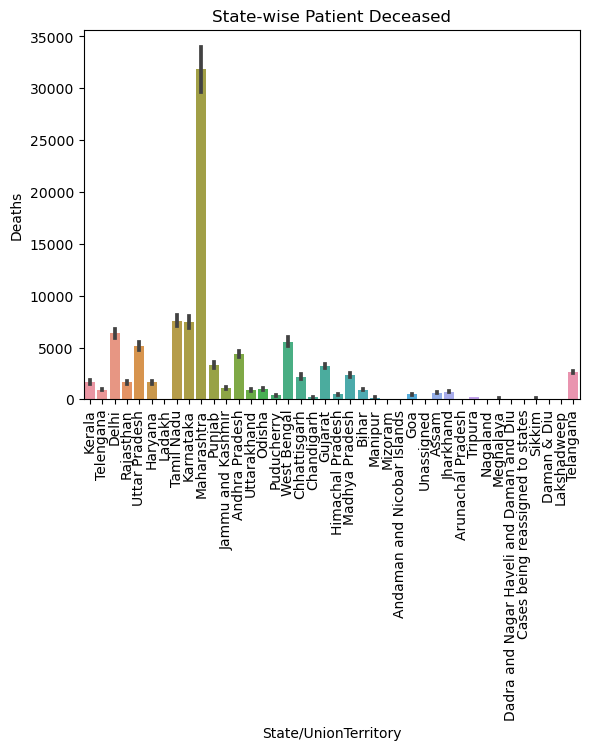

In [29]:
sns.barplot(x = 'State/UnionTerritory', y = 'Deaths', data = data_train_abs_without_outlier)
plt.xticks(rotation=90)
plt.title("State-wise Patient Deceased")
plt.show()

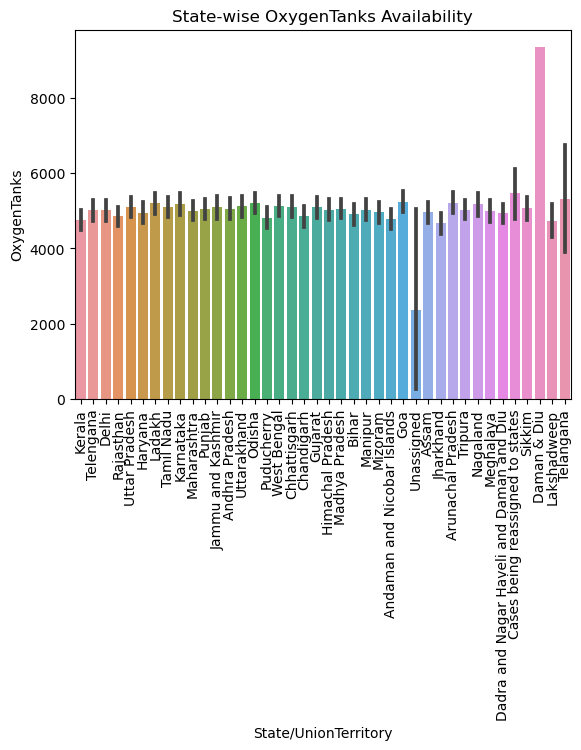

In [30]:
sns.barplot(x = 'State/UnionTerritory', y = 'OxygenTanks', data = data_train_abs_without_outlier)
plt.xticks(rotation=90)
plt.title("State-wise OxygenTanks Availability")
plt.show()

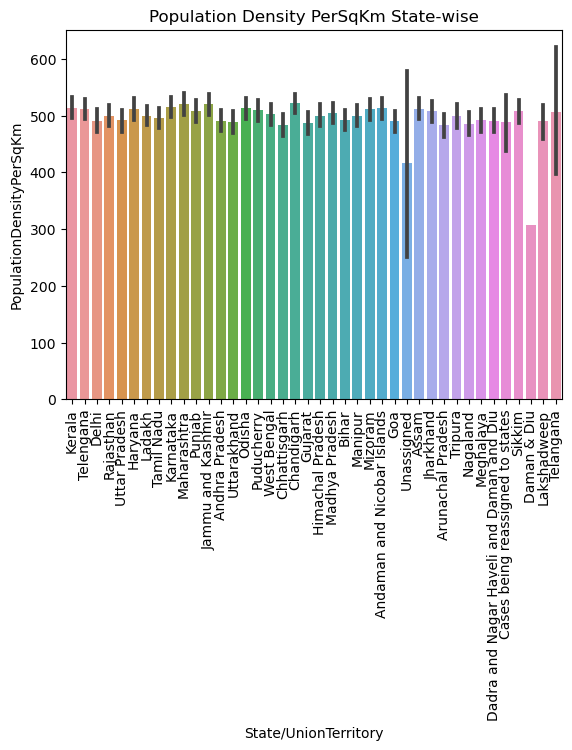

In [31]:
sns.barplot(x = 'State/UnionTerritory', y = 'PopulationDensityPerSqKm', data = data_train_abs_without_outlier)
plt.xticks(rotation=90)
plt.title("Population Density PerSqKm State-wise")
plt.show()

C:\Users\venka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\venka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


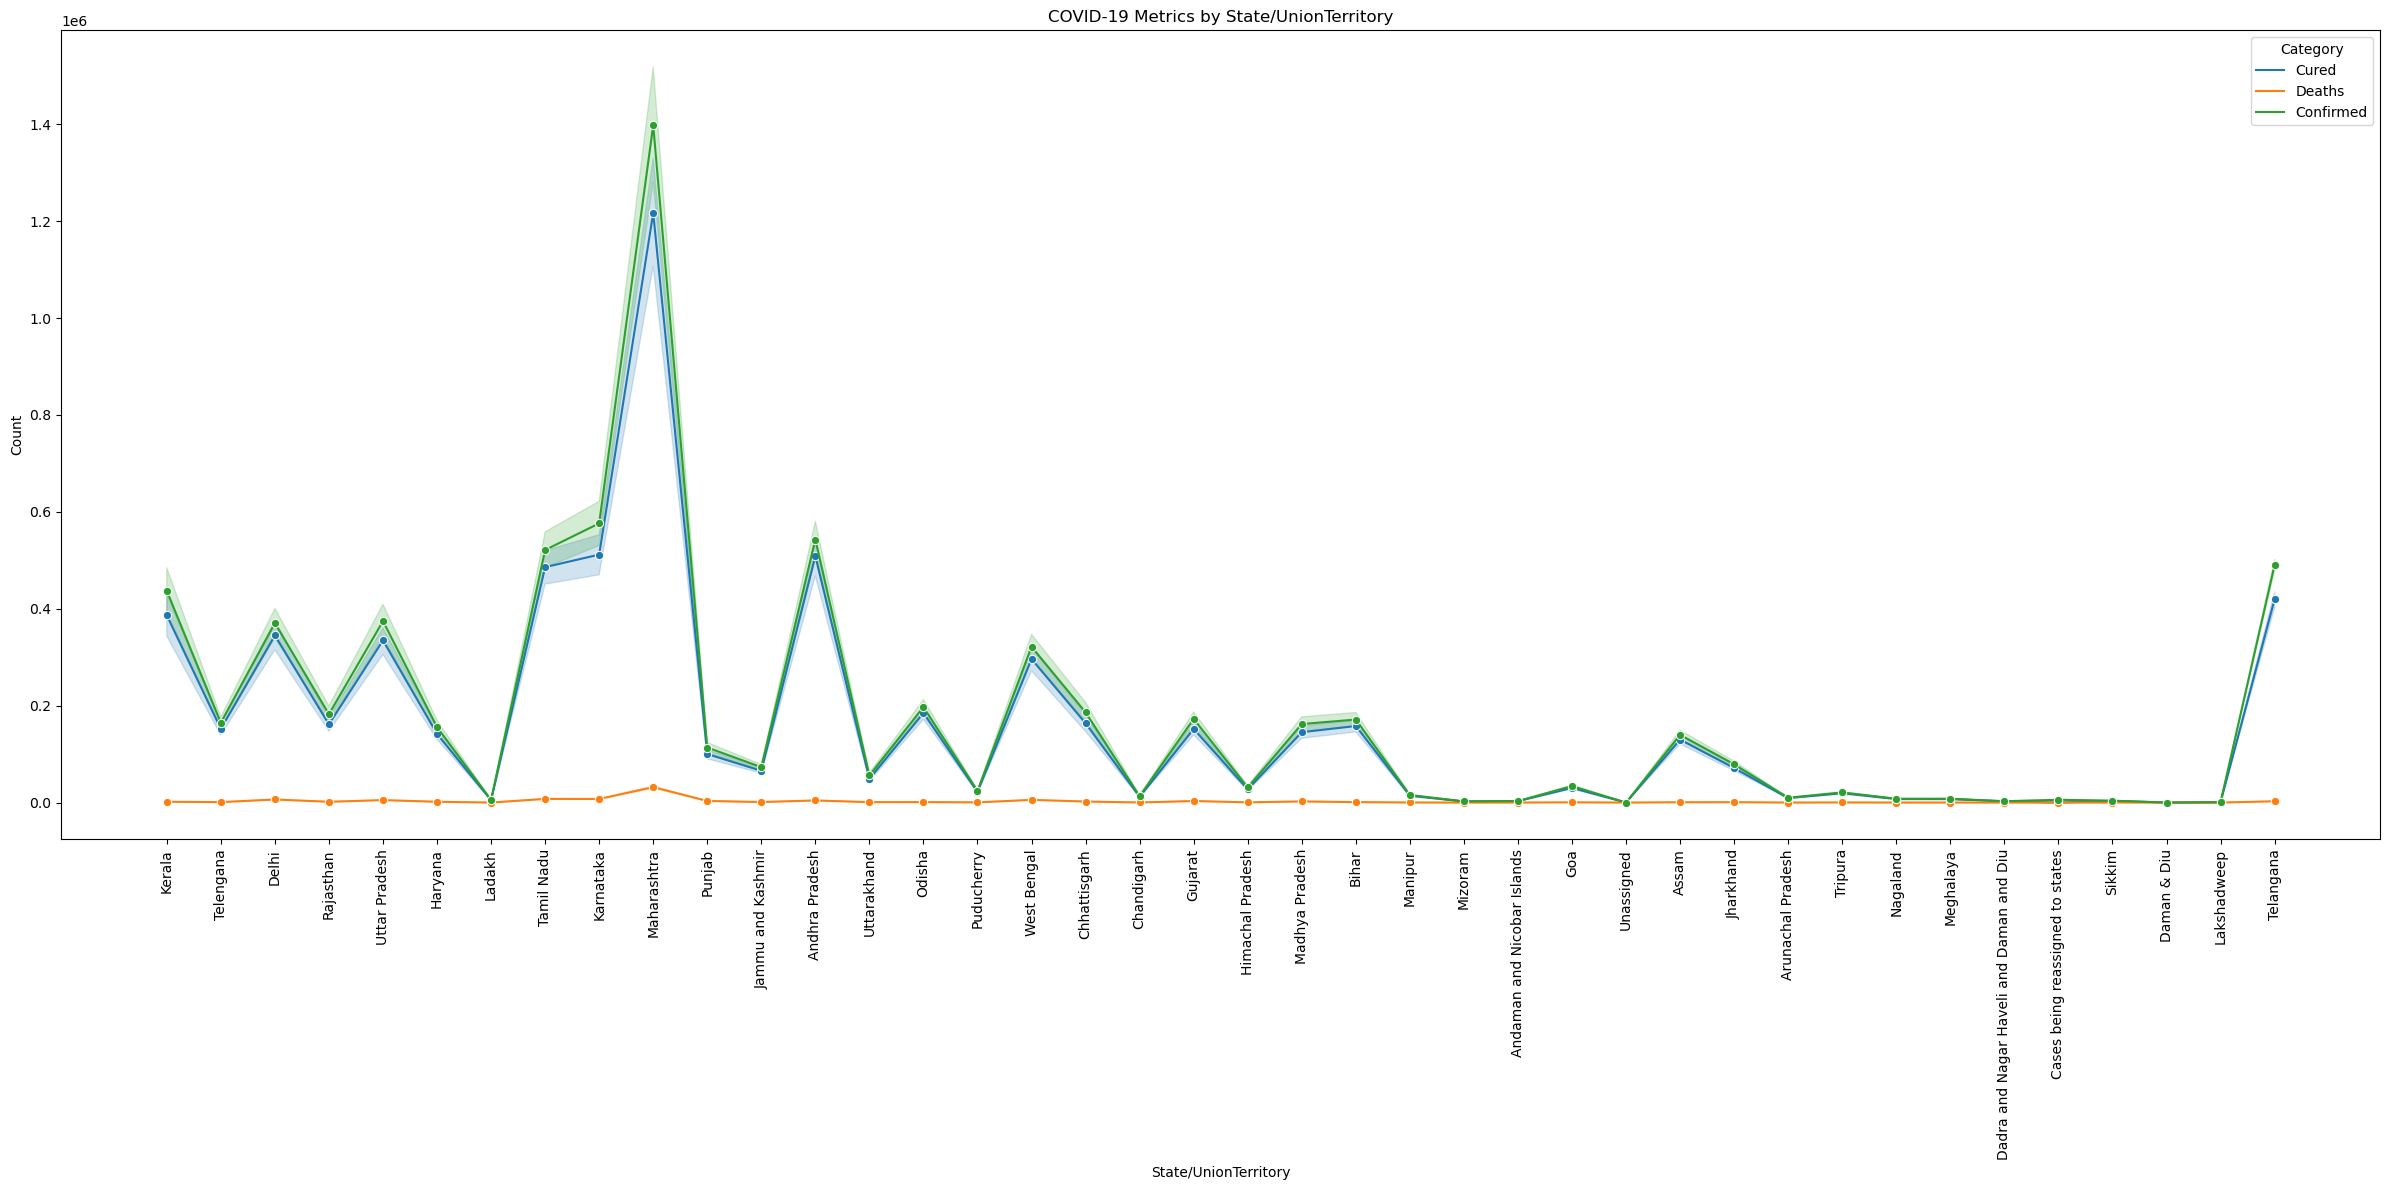

In [32]:
data_train_abs_without_outlier_melted = pd.melt(data_train_abs_without_outlier, id_vars=["State/UnionTerritory"], 
                                                value_vars = ["Cured", "Deaths", "Confirmed"], 
                                                var_name = "Category", value_name="Count")

plt.figure(figsize = (24, 12))
sns.lineplot(data = data_train_abs_without_outlier_melted, x = "State/UnionTerritory", y = "Count", hue = "Category", marker = "o")
plt.title("COVID-19 Metrics by State/UnionTerritory")
plt.xlabel("State/UnionTerritory")
plt.ylabel("Count")
plt.xticks(rotation = 90) 
plt.legend(title='Category')
plt.tight_layout()
plt.show()


In [34]:
#total number of days the case has been repeated
state_count = {}

for num in data_train_abs["State/UnionTerritory"]:
    if num in state_count:
        state_count[num] += 1
    else:
        state_count[num] = 1

for element, count in state_count.items():
    print(f"Number of occurrences of {element}: {count}")

Number of occurrences of Kerala: 474
Number of occurrences of Telengana: 426
Number of occurrences of Delhi: 442
Number of occurrences of Rajasthan: 440
Number of occurrences of Uttar Pradesh: 439
Number of occurrences of Haryana: 440
Number of occurrences of Ladakh: 437
Number of occurrences of Tamil Nadu: 436
Number of occurrences of Karnataka: 435
Number of occurrences of Maharashtra: 435
Number of occurrences of Punjab: 434
Number of occurrences of Jammu and Kashmir: 435
Number of occurrences of Andhra Pradesh: 432
Number of occurrences of Uttarakhand: 428
Number of occurrences of Odisha: 427
Number of occurrences of Puducherry: 425
Number of occurrences of West Bengal: 425
Number of occurrences of Chhattisgarh: 425
Number of occurrences of Chandigarh: 425
Number of occurrences of Gujarat: 424
Number of occurrences of Himachal Pradesh: 423
Number of occurrences of Madhya Pradesh: 423
Number of occurrences of Bihar: 422
Number of occurrences of Manipur: 420
Number of occurrences of 